In [ ]:
import numpy as np
import re 
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
import re
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import collections

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
data =pd.read_csv("/content/CoronaTweetsSentimentAnalysis.csv")
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
1,2,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
2,3,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanit...,Positive
3,4,44963,"Boksburg, South Africa",04-03-2020,Best quality couches at unbelievably low price...,Positive
4,5,44967,"Washington, DC",04-03-2020,While we were busy watching election returns a...,Positive


In [ ]:
tweets = data['OriginalTweet']
y = data['Sentiment']

In [ ]:
from sklearn.preprocessing import LabelEncoder
lbe  = LabelEncoder()
lbe.fit(y)
y = lbe.transform(y)

In [ ]:
def normalize_text(text):
    text=text.lower()
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(pic\.twitter\.com/[^\s]+))','', text)
    text = re.sub('@[^\s]+','', text)
    text = re.sub('#([^\s]+)', '', text)
    text = re.sub('[:;>?<=*+()&,\-#!$%\{˜|\}\[^_\\@\]1234567890’‘]',' ', text)
    text = re.sub('[\d]','', text)
    text = text.replace(".", '')
    text = text.replace("'", '')
    text = text.replace("`", '')
    text = text.replace("'s", '')
    text = text.replace("/", ' ')
    text = text.replace("\"", ' ')
    text = text.replace("\\", '')
    #text =  re.sub(r"\b[a-z]\b", "", text)
    text=re.sub( '\s+', ' ', text).strip()
    
    return text

In [ ]:
tweets  = tweets.apply(normalize_text)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer  = TfidfVectorizer()
vectorizer.fit(tweets)

TfidfVectorizer()

In [ ]:
X = vectorizer.transform(tweets)

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X.toarray(),y,test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb  = GradientBoostingClassifier()
gb.fit(train_x,train_y)

GradientBoostingClassifier()

In [ ]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pred = gb.predict(test_x)

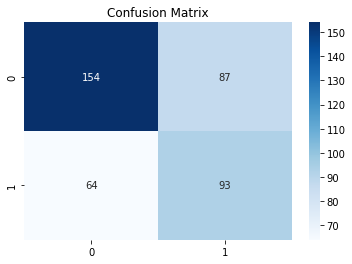

In [ ]:
plt.title("Confusion Matrix")
sns.heatmap(confusion_matrix(pred,test_y),annot  = True, cmap = "Blues", fmt='g')
plt.show()

In [ ]:
print(f"Accuracy  = {accuracy_score(pred,test_y) * 100} %" )

Accuracy  = 62.06030150753769 %


In [ ]:
print(classification_report(pred,test_y))

              precision    recall  f1-score   support

           0       0.71      0.64      0.67       241
           1       0.52      0.59      0.55       157

    accuracy                           0.62       398
   macro avg       0.61      0.62      0.61       398
weighted avg       0.63      0.62      0.62       398

